# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [9]:
import os 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [10]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", "pourquoi","chef",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous", "surtout", "branquart",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non", "prochain", "ord", "mme",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres", "but", "nouveau", "nord",
       "van", "het", "autre", "jusqu", "ceux", "quelques", "rue", "mois", "leurs", "toute", "grand", "belg",
       "générale", "jour", "jours", "parce", "etc", "seule","suite", "liste", "alors", "vient", "moment", "disp",
       "heures", "déjà", "chaque", "avant", "seul", "pris", "faits", "mis", "page", "millions", "atel", "juin", 
       "premier", "vie", "réponse", "nombre", "compte", "point", "presse", "travail", "mars", "commune", "cap", "div"]
sw = set(sw)

In [11]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

251 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'alors', 'après', 'as', 'atel', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'belg', 'bien', 'branquart', 'but', 'c', 'cap', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'ceux', 'chaque', 'chef', 'comme', 'commune', 'compte', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'disp', 'dit', 'div', 'doit', 'donc', 'dont', 'du', 'déjà', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'etc', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faits', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'grand', 'g

## Tokeniser

In [12]:
# Récupération du contenu du fichier
path = "../data/camille_crise_economique_année 30/KB_JB838_1929-02-22_01-00001.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [13]:
# Lister les Fichiers
data_path = "../data/camille_crise_economique_année 30/"
files = os.listdir(data_path)

In [14]:
# Tokenization de tous les documents 
words = []
for f in sorted(files)[:3]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    words += nltk.wordpunct_tokenize(text)
    print(f"{len(words)} words found")

7191 words found
26296 words found
33035 words found


In [15]:
words[:10]

['43', 'm', "'", 'ANNEE', '.', '—', 'N', '*', '53', '••••••••']

## Calculer la taille du vocabulaire

In [16]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

9410 words kept (5959 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [17]:
fdist = nltk.FreqDist(kept)
fdist.most_common(100)

[('congo', 33),
 ('belge', 32),
 ('pays', 27),
 ('anvers', 24),
 ('francs', 23),
 ('cours', 23),
 ('gaz', 22),
 ('bruxelles', 20),
 ('paris', 19),
 ('fond', 18),
 ('lin', 18),
 ('avril', 17),
 ('com', 16),
 ('crise', 16),
 ('liège', 16),
 ('fer', 16),
 ('bar', 15),
 ('londres', 14),
 ('belgique', 14),
 ('cim', 14),
 ('huile', 14),
 ('très', 13),
 ('port', 13),
 ('place', 12),
 ('lieu', 12),
 ('gouvernement', 12),
 ('fin', 12),
 ('bel', 12),
 ('klect', 12),
 ('samedi', 11),
 ('impôts', 11),
 ('fonds', 11),
 ('belges', 11),
 ('part', 11),
 ('peu', 11),
 ('arg', 11),
 ('aut', 11),
 ('prix', 10),
 ('industrie', 10),
 ('action', 10),
 ('union', 10),
 ('industries', 10),
 ('mines', 10),
 ('priv', 10),
 ('jouis', 10),
 ('car', 10),
 ('ind', 10),
 ('lux', 10),
 ('actions', 10),
 ('cent', 10),
 ('flot', 10),
 ('mai', 10),
 ('soir', 9),
 ('elles', 9),
 ('trop', 9),
 ('ans', 9),
 ('loi', 9),
 ('valeurs', 9),
 ('banque', 9),
 ('nat', 9),
 ('soie', 9),
 ('production', 9),
 ('monde', 8),
 ('économiq

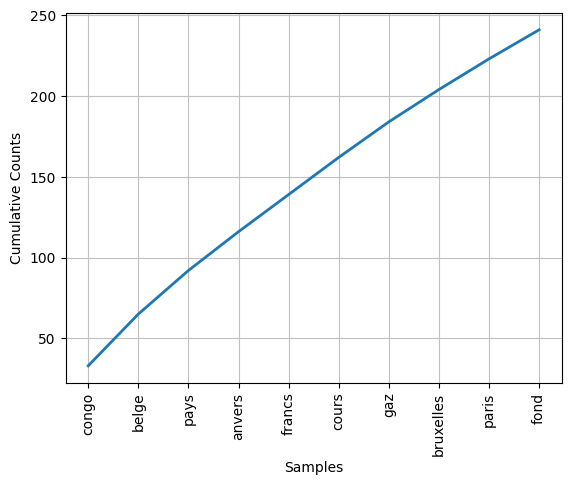

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [18]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [19]:
fdist.hapaxes()[:30]

['annee',
 'troismois',
 'conventions',
 'postales',
 'oomcc',
 'province',
 'aicnnt',
 'jfc',
 'rossel',
 'fleet',
 'téléphones',
 'imprimerie',
 'compta',
 'chèques',
 'avpr',
 'nwnigt',
 'rla',
 'photographies',
 'magnifiques',
 'souveni',
 'entier',
 'texte',
 'partout',
 'réductions',
 'ligue',
 'fascicule',
 'hebdomadaire',
 'appelle',
 'réserves',
 'contient']